# Using Natural Language Processing To Check Word Frequency In ‘The Adventure of Sherlock Holmes’

### Natural Language Processing is one of the most commonly used technique which is implemented in machine learning applications — given the wide range of analysis, extraction, processing and visualising tasks that it can perform. In this article, you will learn how to implement all of these aspects and present your project. The primary goal of this project is to tokenize the textual content, remove the stop words and find the high frequency words. 

### We are using the eBook for, The Adventure of Sherlock Holmes by Sir Arthur Conan Doyle, which is available http://www.gutenberg.org/files/1661/1661-h/1661-h.htm

## Data Extraction:

In [62]:
#get the url from above
link='http://www.gutenberg.org/files/1661/1661-h/1661-h.htm'

In [4]:
!pip install --upgrade pip

    100% |████████████████████████████████| 1.3MB 430kB/s ta 0:00:01
  Found existing installation: pip 9.0.3
    Uninstalling pip-9.0.3:
      Successfully uninstalled pip-9.0.3


In [5]:
! pip install requests

grin 1.2.1 requires argparse>=1.1, which is not installed.
distributed 1.20.2 has requirement tornado>=4.5.1, but you'll have tornado 4.3 which is incompatible.
jupyterlab-launcher 0.10.2 has requirement jsonschema>=2.6.0, but you'll have jsonschema 2.5.1 which is incompatible.
networkx 2.1 has requirement decorator>=4.1.0, but you'll have decorator 4.0.9 which is incompatible.


###### Now, after we have the URL, let us try to make a request. Once you are go through the browser while visiting a web page, it shows request as below. requests make this easy with its function. Make the request here and check the object type returned. There are other types of requests, such as POST requests, but that is not of our concern for this project.

In [28]:
#import request libary
import requests

#make the request with url
request=requests.get(link)

###### After getting the html script from the link, let us process this html to get the text from the body.



In [30]:
#extract html from 'request'
html=request.text
html

u'<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.01 Transitional//EN">\r\n<HTML>\r\n<HEAD>\r\n<TITLE>The Project Gutenberg eBook of The Adventures of Sherlock Holmes, by Sir Arthur Conan Doyle</TITLE>\r\n<META http-equiv="Content-Type" content="text/html; charset=iso-8859-1">\r\n<STYLE TYPE="text/css">\r\n<!--\r\nDIV.book { margin-left: 5%; margin-right: 5%; text-align: justify; }\r\nDIV.toc { margin-left: 3%; text-align: left; }\r\nP { text-indent: 2em; margin-top: 0; margin-bottom: 0; }\r\nTABLE.bold { font-weight: bold; }\r\n-->\r\n</STYLE>\r\n</HEAD>\r\n<BODY>\r\n\r\n\r\n<pre>\r\n\r\nProject Gutenberg\'s The Adventures of Sherlock Holmes, by Arthur Conan Doyle\r\n\r\nThis eBook is for the use of anyone anywhere at no cost and with\r\nalmost no restrictions whatsoever.  You may copy it, give it away or\r\nre-use it under the terms of the Project Gutenberg License included\r\nwith this eBook or online at www.gutenberg.net\r\n\r\n\r\nTitle: The Adventures of Sherlock Holmes\r\n\r\nAuthor: 

### Text Extraction From HTML:

###### We shall make use of Beautifulsoup to extract the string of words from the html content. Let’s import the Beautifulsoup from bs4 and parse the html content with the argument “htmllib”. You can also use other parameters such as “lxml”, “html” etc.



In [31]:
#import beautifulSoup from bs4
from bs4 import BeautifulSoup

#create a beautifulSoup objective from html
soup=BeautifulSoup(html,"html5lib")

###### Let us look at the title of the eBook, to learn more about the functioning of the Beautifulsoup here.

In [43]:
soup.title

<title>The Project Gutenberg eBook of The Adventures of Sherlock Holmes, by Sir Arthur Conan Doyle</title>

###### To extract just the string from the contents inside the title tag, follow this code

In [44]:
soup.title.string

u'The Project Gutenberg eBook of The Adventures of Sherlock Holmes, by Sir Arthur Conan Doyle'

###### Let us take a look at all the chapter available inside the book and how they are represented in HTML code.

In [45]:
soup.findAll('a')[:12]

[<a href="#1">A Scandal in Bohemia</a>,
 <a href="#2">The Red-Headed League</a>,
 <a href="#3">A Case of Identity</a>,
 <a href="#4">The Boscombe Valley Mystery</a>,
 <a href="#5">The Five Orange Pips</a>,
 <a href="#6">The Man with the Twisted Lip</a>,
 <a href="#7">The Adventure of the Blue Carbuncle</a>,
 <a href="#8">The Adventure of the Speckled Band</a>,
 <a href="#9">The Adventure of the Engineer\u2019s Thumb</a>,
 <a href="#10">The Adventure of the Noble Bachelor</a>,
 <a href="#11">The Adventure of the Beryl Coronet</a>,
 <a href="#12">The Adventure of the Copper Beeches</a>]

###### This is the output that we are looking for. The complete Sherlock Holmes’ eBook textual content can be access with .get_text() command.

In [66]:
text=soup.get_text()

###### Now that you have the text of interest, it’s time for you to count how many times each word appears and to plot the frequency histogram that you want. This is where Natural Language Processing comes into picture.

### Extract Words From Your Text With NLP:
We’ll now use nltk, the Natural Language Toolkit, to

1.Tokenise the text (splitting sentences into words (list of words));
2.Remove stopwords (remove words such as ‘a’ and ‘the’ that occur at a great frequency).
We will be using the regular expressions first, to remove all the unwanted data from the text.

-the ‘\w’ is a special character that will match any alphanumeric A-z, a-z, 0-9, along with underscores;
-The ‘+’ tells you that the previous character in the regex can appear as many times as you want in strings that you;re trying to match. This means that ‘\w+’ will match arbitrary sequences of alphanumeric characters and underscores.

In [47]:
import re 

#find all athe words in sherlocks holmes and print several
tokens=re.findall('\w+',text)
tokens[:100]

[u'The',
 u'Project',
 u'Gutenberg',
 u'eBook',
 u'of',
 u'The',
 u'Adventures',
 u'of',
 u'Sherlock',
 u'Holmes',
 u'by',
 u'Sir',
 u'Arthur',
 u'Conan',
 u'Doyle',
 u'DIV',
 u'book',
 u'margin',
 u'left',
 u'5',
 u'margin',
 u'right',
 u'5',
 u'text',
 u'align',
 u'justify',
 u'DIV',
 u'toc',
 u'margin',
 u'left',
 u'3',
 u'text',
 u'align',
 u'left',
 u'P',
 u'text',
 u'indent',
 u'2em',
 u'margin',
 u'top',
 u'0',
 u'margin',
 u'bottom',
 u'0',
 u'TABLE',
 u'bold',
 u'font',
 u'weight',
 u'bold',
 u'Project',
 u'Gutenberg',
 u's',
 u'The',
 u'Adventures',
 u'of',
 u'Sherlock',
 u'Holmes',
 u'by',
 u'Arthur',
 u'Conan',
 u'Doyle',
 u'This',
 u'eBook',
 u'is',
 u'for',
 u'the',
 u'use',
 u'of',
 u'anyone',
 u'anywhere',
 u'at',
 u'no',
 u'cost',
 u'and',
 u'with',
 u'almost',
 u'no',
 u'restrictions',
 u'whatsoever',
 u'You',
 u'may',
 u'copy',
 u'it',
 u'give',
 u'it',
 u'away',
 u'or',
 u're',
 u'use',
 u'it',
 u'under',
 u'the',
 u'terms',
 u'of',
 u'the',
 u'Project',
 u'Gutenber

###### Let us now convert all the uppercase letters to lowercase letters, which is a mandatory task because in Python, uppercase and lowercase are considered as different objects.

In [55]:
#intializa new list 
words=[]

#loop through th list tokens and Make lower case
for word in tokens:
    words.append(word.lower())
    
#print several items from list as sanity check
words[:8]

[u'the',
 u'project',
 u'gutenberg',
 u'ebook',
 u'of',
 u'the',
 u'adventures',
 u'of']

# Removal Of Stop Words:

###### It is common practice to remove words that appear frequently in the English language such as ‘the’, ‘of’ and ‘a’ (known as stopwords) because they’re not so interesting.The package nltk has a list of stopwords in English which you’ll now store as sw and of which you’ll print the first several elements.If you get an error here, run the command nltk.download (‘stopwords’) to install the stopwords on your system.



In [49]:
#import nltk
import nltk

#Get english Stopwords and print some of them
sw = nltk.corpus.stopwords.words('English')
sw[:5]

[u'i', u'me', u'my', u'myself', u'we']

###### Now we need to remove all the words that are now in sw  from the original text to complete the NLTK extraction and processing.

In [57]:
#instaalize new list
words_ns=[]

#add to words _ns  to all that are in words but not in sw
for word in words:
    if  word not in sw:
        words_ns.append(word)

#print several list items  from  sanity check
words_ns[:8]

[u'project',
 u'gutenberg',
 u'ebook',
 u'adventures',
 u'sherlock',
 u'holmes',
 u'sir',
 u'arthur']

# Presenting The Project:

###### With the help of seaborn and matplotlib, let us visualise how the data is scattered and present our NLP model on the book The Adventures of Sherlock Holmes by Arthur Conan Doyle.

In [58]:
#import darvis libary
import matplotlib.pyplot as plt
import seaborn as sns

In [59]:
#import inline and set visualization style
%matplotlib inline
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.set_style('darkgrid')

In [60]:
#create freq dist and plot
nlp_words=nltk.FreqDist(words_ns)
nlp_words

FreqDist({u'aided': 1,
          u'writings': 1,
          u'pardon': 2,
          u'temperament': 1,
          u'knelt': 1,
          u'yellow': 15,
          u'four': 38,
          u'woods': 7,
          u'hanging': 7,
          u'scheming': 1,
          u'captain': 2,
          u'whistles': 2,
          u'whose': 23,
          u'swag': 1,
          u'augustine': 1,
          u'granting': 1,
          u'eligible': 2,
          u'rouse': 1,
          u'swan': 2,
          u'characterises': 1,
          u'seriously': 5,
          u'originality': 1,
          u'nominal': 3,
          u'trousers': 7,
          u'lord': 41,
          u'sorry': 10,
          u'flicking': 1,
          u'meadows': 2,
          u'shaving': 1,
          u'sinking': 3,
          u'updated': 1,
          u'comparatively': 2,
          u'point': 45,
          u'rescue': 1,
          u'void': 1,
          u'presses': 1,
          u'ornaments': 1,
          u'smack': 3,
          u'georgia': 2,
          u'uncongen

###### Let us now look at how the graph looks and also the tokenised word count. Here we will be ending our model and finally present our findings with the graph below.



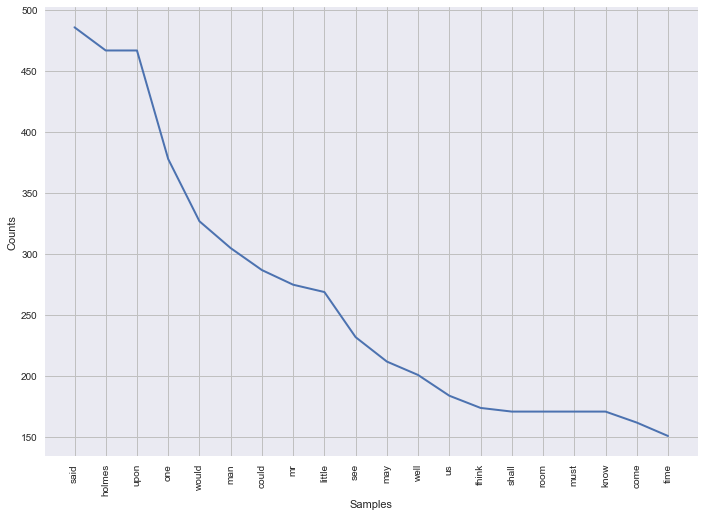

In [61]:
nlp_words.plot(20)